<a href="https://colab.research.google.com/github/micahks/DS-Unit-2-Linear-Models/blob/master/module4-logistic-regression/Micah_LS_DS_214_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 1, Module 4*

---

# Logistic Regression


## Assignment 🌯

You'll use a [**dataset of 400+ burrito reviews**](https://srcole.github.io/100burritos/). How accurately can you predict whether a burrito is rated 'Great'?

> We have developed a 10-dimensional system for rating the burritos in San Diego. ... Generate models for what makes a burrito great and investigate correlations in its dimensions.

- [ ] Do train/validate/test split. Train on reviews from 2016 & earlier. Validate on 2017. Test on 2018 & later.
- [ ] Begin with baselines for classification.
- [ ] Use scikit-learn for logistic regression.
- [ ] Get your model's validation accuracy. (Multiple times if you try multiple iterations.)
- [ ] Get your model's test accuracy. (One time, at the end.)
- [ ] Commit your notebook to your fork of the GitHub repo.


## Stretch Goals

- [ ] Add your own stretch goal(s) !
- [ ] Make exploratory visualizations.
- [ ] Do one-hot encoding.
- [ ] Do [feature scaling](https://scikit-learn.org/stable/modules/preprocessing.html).
- [ ] Get and plot your coefficients.
- [ ] Try [scikit-learn pipelines](https://scikit-learn.org/stable/modules/compose.html).

#Data Import

In [2]:
%%capture
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Linear-Models/master/data/'
    !pip install category_encoders==2.*

# If you're working locally:
else:
    DATA_PATH = '../data/'

In [3]:
# Load data downloaded from https://srcole.github.io/100burritos/
import pandas as pd
df = pd.read_csv(DATA_PATH+'burritos/burritos.csv')

In [4]:
# Derive binary classification target:
# We define a 'Great' burrito as having an
# overall rating of 4 or higher, on a 5 point scale.
# Drop unrated burritos.
df = df.dropna(subset=['overall'])
df['Great'] = df['overall'] >= 4

In [5]:
# Clean/combine the Burrito categories
df['Burrito'] = df['Burrito'].str.lower()

california = df['Burrito'].str.contains('california')
asada = df['Burrito'].str.contains('asada')
surf = df['Burrito'].str.contains('surf')
carnitas = df['Burrito'].str.contains('carnitas')

df.loc[california, 'Burrito'] = 'California'
df.loc[asada, 'Burrito'] = 'Asada'
df.loc[surf, 'Burrito'] = 'Surf & Turf'
df.loc[carnitas, 'Burrito'] = 'Carnitas'
df.loc[~california & ~asada & ~surf & ~carnitas, 'Burrito'] = 'Other'

In [6]:
# Drop some high cardinality categoricals
df = df.drop(columns=['Notes', 'Location', 'Reviewer', 'Address', 'URL', 'Neighborhood'])

In [7]:
# Drop some columns to prevent "leakage"
df = df.drop(columns=['Rec', 'overall'])

In [8]:
df['Date']= pd.to_datetime(df['Date'])

In [9]:
import numpy as np

#Change x's to 1's

df.replace(['x', 'X'], 1, inplace=True)

#Change yes's to 1's

df.replace(['Yes'], 1, inplace=True)

#Change no's to 0's

df.replace(['No'], 0, inplace=True)

#Change Nan's to 0

df.replace(np.NaN, 0, inplace=True)

#Split Data

In [10]:
#set index to the date

df.set_index('Date', inplace=True)

In [11]:
#take out the burrito columns

df_nobur = df.drop(columns=['Burrito'])

In [12]:
target = 'Great'
y=df_nobur[target]
X=df_nobur.drop(columns=target)

In [13]:
#separate the Training Set

tr_cutoff = '12/31/2016'
val_cutoff = '12/31/2017'

tr_mask = X.index <= tr_cutoff
val_mask = (X.index > tr_cutoff) & (X.index <= val_cutoff)
test_mask = X.index > val_cutoff

X_train, y_train = X[tr_mask], y[tr_mask]
X_val, y_val = X[val_mask], y[val_mask]
X_test, y_test = X[test_mask], y[test_mask]

y_val

Date
2017-01-04    False
2017-01-04    False
2017-01-07    False
2017-01-07    False
2017-01-10    False
              ...  
2017-09-05     True
2017-09-05     True
2017-12-16    False
2017-12-29     True
2017-12-29     True
Name: Great, Length: 85, dtype: bool

In [14]:
assert len(X) == len(X_train) + len(X_val) + len(X_test)

#Establish Baseline

In [15]:
print('Baseline accuracy:', y_train.value_counts(normalize=True).max())

Baseline accuracy: 0.5906040268456376


#Logistic Regression

In [16]:

# Step 1: Import the predictor
from sklearn.linear_model import LogisticRegression

# Step 2: Instantiate the predictor
model = LogisticRegression()

# Step 3: Fit the model to the training data
model.fit(X_train, y_train)

# Step 4: Make predications... see below

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [17]:
print('Training Accuracy Score:', model.score(X_train, y_train))
print('Validation Accuracy Score:', model.score(X_val, y_val))

Training Accuracy Score: 0.8791946308724832
Validation Accuracy Score: 0.8117647058823529


In [18]:
print('Testing Accuracy Score:', model.score(X_test, y_test))

Testing Accuracy Score: 0.7894736842105263


#Pipeline trying different transformers and logistic regression

In [19]:
#Do again with Burrito Column

target = 'Great'
y=df[target]
X=df.drop(columns=target)

In [20]:
#separate the Training Set

tr_cutoff = '12/31/2016'
val_cutoff = '12/31/2017'

tr_mask = X.index <= tr_cutoff
val_mask = (X.index > tr_cutoff) & (X.index <= val_cutoff)
test_mask = X.index > val_cutoff

X_train, y_train = X[tr_mask], y[tr_mask]
X_val, y_val = X[val_mask], y[val_mask]
X_test, y_test = X[test_mask], y[test_mask]

y_val

Date
2017-01-04    False
2017-01-04    False
2017-01-07    False
2017-01-07    False
2017-01-10    False
              ...  
2017-09-05     True
2017-09-05     True
2017-12-16    False
2017-12-29     True
2017-12-29     True
Name: Great, Length: 85, dtype: bool

In [21]:
assert len(X) == len(X_train) + len(X_val) + len(X_test)

##Establish Baseline

In [22]:
print('Baseline accuracy:', y_train.value_counts(normalize=True).max())

Baseline accuracy: 0.5906040268456376


## Pipeline

In [23]:
from category_encoders import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [24]:
model = make_pipeline(
       OneHotEncoder(use_cat_names=True),
       StandardScaler(),
       LogisticRegression()
)

model.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


Pipeline(memory=None,
         steps=[('onehotencoder',
                 OneHotEncoder(cols=['Burrito'], drop_invariant=False,
                               handle_missing='value', handle_unknown='value',
                               return_df=True, use_cat_names=True, verbose=0)),
                ('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('logisticregression',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [25]:
print('Training Accuracy Score:', model.score(X_train, y_train))
print('Validations Accuracy Score:', model.score(X_val, y_val))

Training Accuracy Score: 0.9228187919463087
Validations Accuracy Score: 0.7647058823529411


In [26]:
# Get coefficients from model
coefficients = model.named_steps['logisticregression'].coef_
features = model.named_steps['onehotencoder'].get_feature_names()

coefficients = coefficients[0]

coefficients

array([ 0.36074574, -0.01944579, -0.03259583, -0.52758672,  0.36251075,
       -0.02592913, -0.13638388, -0.04753679, -0.05058084,  0.28394226,
        0.        ,  0.        , -0.70874534, -0.09214771,  0.25876146,
        0.75355949,  0.42309362,  0.91067169,  0.85721987,  0.94439029,
        0.02448929,  0.31873641,  2.03788619,  0.10926134,  0.93799262,
        0.2015769 , -0.65357567, -0.14501707,  0.22328132,  0.06089903,
       -0.26502112,  0.08174587, -0.07727624, -0.31660239, -0.05844871,
       -0.15897536,  0.20469692, -0.58952242, -0.26737664, -0.15365283,
       -0.28997244, -0.00570947, -0.05641498,  0.07113168, -0.03253595,
        0.34916972,  0.11335333,  0.04930282, -0.83836489,  0.50013717,
        0.13000681,  0.26345593, -0.08694831,  0.        ,  0.02533353,
        0.09670418,  0.27493838,  0.18698667, -0.38227961, -0.00366292,
        0.58748743])

In [27]:
feat_importances = pd.Series(coefficients, index=features).sort_values(key=lambda x: abs(x), ascending=False)

feat_importances

Synergy           2.037886
Meat:filling      0.944390
Unreliable        0.937993
Meat              0.910672
Fillings          0.857220
                    ...   
Carrots          -0.005709
Corn             -0.003663
Mass (g)          0.000000
Density (g/mL)    0.000000
Queso             0.000000
Length: 61, dtype: float64

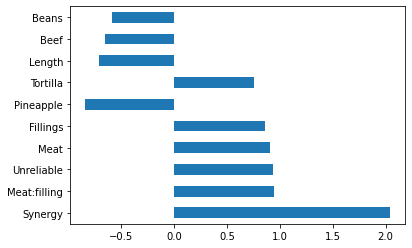

In [28]:
 # Plot feature importances
feat_importances.head(10).plot(kind='barh');